<a href="https://colab.research.google.com/github/suzy-hur/IOD_lab_work/blob/main/Lab_7_1_1_Decision_Trees_010723.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data Science and AI
## Lab 7.1.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
import csv

with open('transfusion.data', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        # Access data row-wise
        print(row)

['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)', 'whether he/she donated blood in March 2007']
['2 ', '50', '12500', '98 ', '1']
['0 ', '13', '3250', '28 ', '1']
['1 ', '16', '4000', '35 ', '1']
['2 ', '20', '5000', '45 ', '1']
['1 ', '24', '6000', '77 ', '0']
['4 ', '4', '1000', '4 ', '0']
['2 ', '7', '1750', '14 ', '1']
['1 ', '12', '3000', '35 ', '0']
['2 ', '9', '2250', '22 ', '1']
['5 ', '46', '11500', '98 ', '1']
['4 ', '23', '5750', '58 ', '0']
['0 ', '3', '750', '4 ', '0']
['2 ', '10', '2500', '28 ', '1']
['1 ', '13', '3250', '47 ', '0']
['2 ', '6', '1500', '15 ', '1']
['2 ', '5', '1250', '11 ', '1']
['2 ', '14', '3500', '48 ', '1']
['2 ', '15', '3750', '49 ', '1']
['2 ', '6', '1500', '15 ', '1']
['2 ', '3', '750', '4 ', '1']
['2 ', '3', '750', '4 ', '1']
['4 ', '11', '2750', '28 ', '0']
['2 ', '6', '1500', '16 ', '1']
['2 ', '6', '1500', '16 ', '1']
['9 ', '9', '2250', '16 ', '0']
['4 ', '14', '3500', '40 ', '0']
['4 ', '6', '1500', '14 ', '0

In [2]:
import pandas as pd

df = pd.read_csv('transfusion.data')
print(df.columns)

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')


In [3]:
# Import Libraries

import numpy as np
import pandas as pd

# %matplotlib inline
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import seaborn as sns
import warnings

In [4]:
sns.set(style='ticks', font_scale=1.4)
warnings.filterwarnings('ignore')

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

- Number of features: 5

- Column names
  - Recency (months)
  - Frequency (times)
  - Monetary (c.c. blood)
  - Time (months)
  - whether he/she donated blood in March 2007

- Data types
Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

- Domains, Intervals
  - Recency (months): min: 0, max: 74
    values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 35, 38, 39, 40, 72, 74]
  - Frequency (times): min: 1, max: 50
    values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 33, 34, 38, 41, 43, 44, 46, 50]
  - Monetary (c.c. blood): min: 250, max: 12500
    values: [250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000, 4250, 4500, 4750, 5000

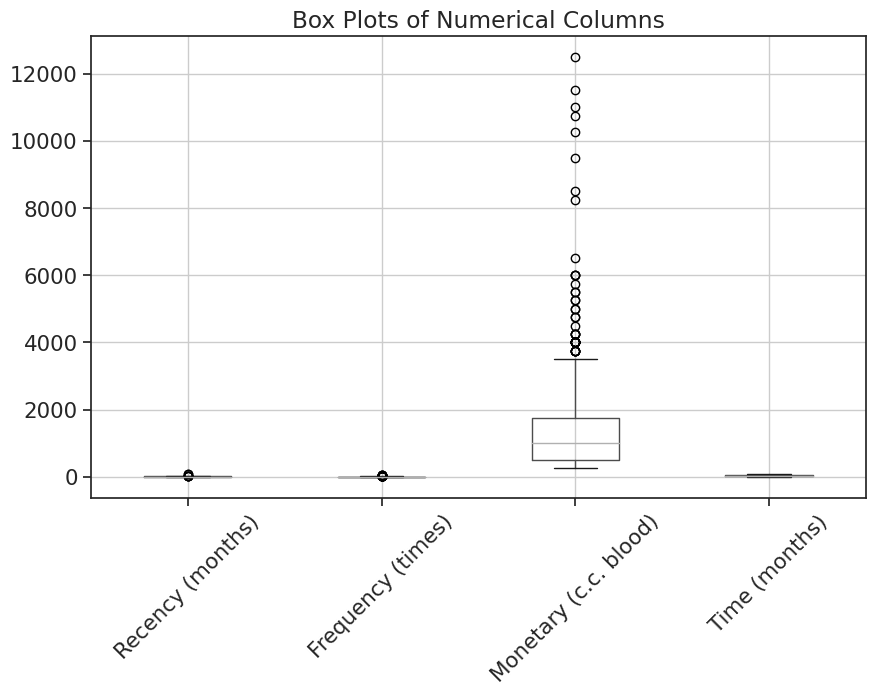

In [5]:
# Number of features
num_features = df.shape[1]
print(f'- Number of features: {num_features}')

# Column names
print('\n- Column names')
for column in df.columns:
    print(f'  - {column}')

# Data types
print('\n- Data types')
print(df.dtypes)

# Domains, Intervals
print('\n- Domains, Intervals')
for column in df.columns:
    unique_values = sorted(df[column].unique())
    print(f'  - {column}: min: {df[column].min()}, max: {df[column].max()}')
    print(f'    values: {unique_values}')

# Nulls
print('\n- Nulls')
for column in df.columns:
    num_nulls = df[column].isna().sum()
    print(f'  - {column}: Nulls: {num_nulls}')


# Select columns with numerical data
numerical_columns = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)']

# Create box plots for numerical columns
plt.figure(figsize=(10, 6))
df[numerical_columns].boxplot()
plt.title('Box Plots of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

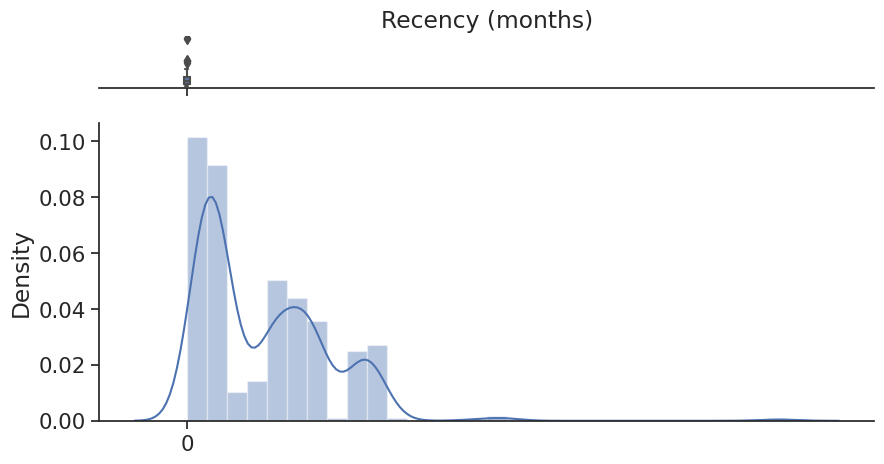

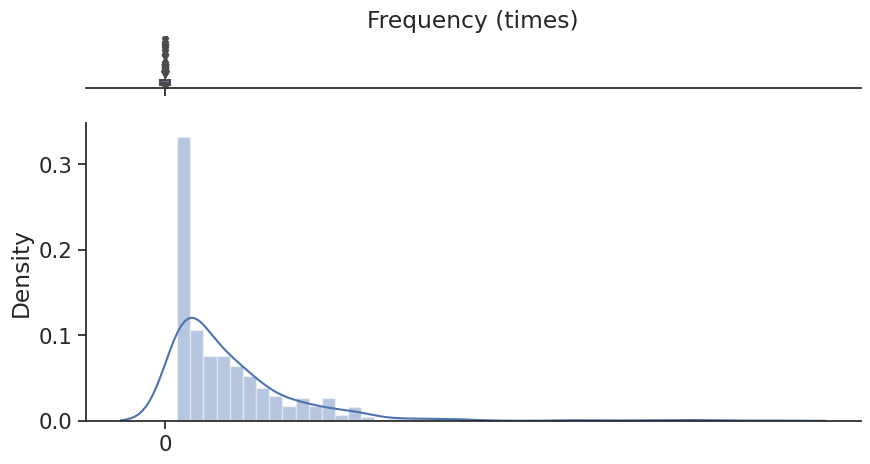

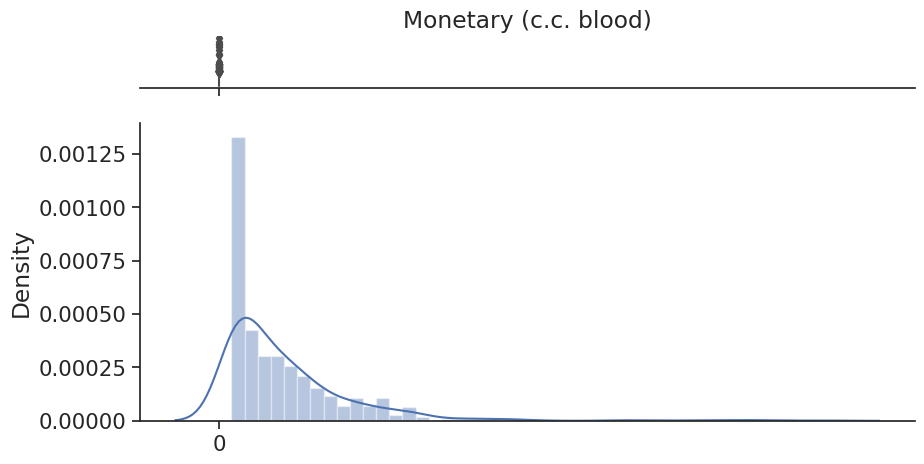

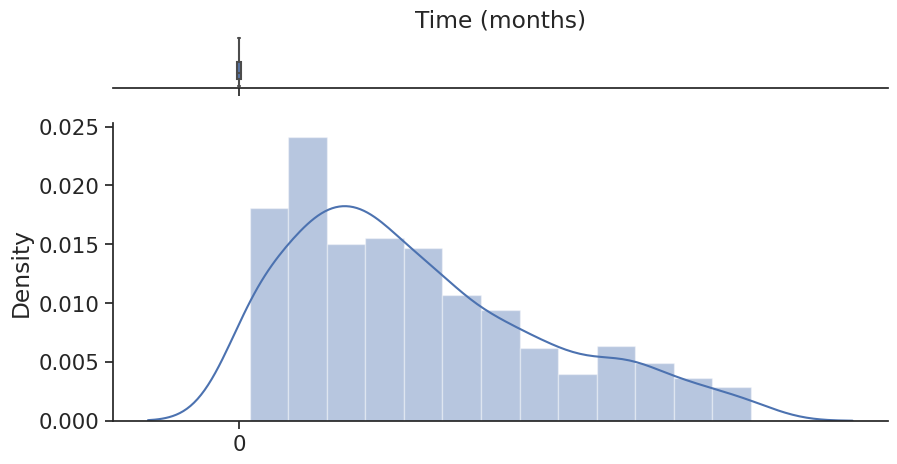

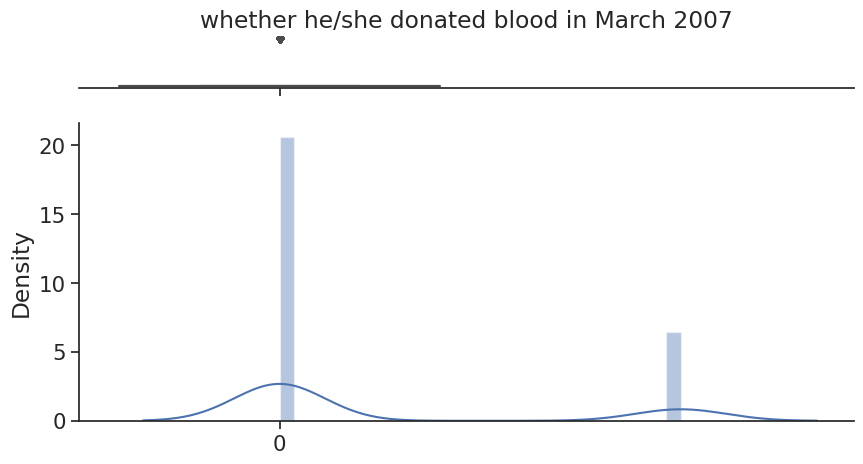

In [6]:
# Check for Outliers
for c in df.columns:
    fig, ax = plt.subplots(2,
                           figsize=(10, 5),
                           sharex=True,
                           gridspec_kw={'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(df[c], ax=ax_box)
    ax_box.set(title=c, yticks=[], xlabel='')
    sns.despine(ax=ax_box, left=True)

    ax_hist = ax[1]
    ax_hist = sns.distplot(df[c], ax=ax_hist)
    ax_hist.set(xlabel='')
    sns.despine(ax=ax_hist)

plt.show()

In [7]:
# Specify the column names for the features and the target variable
features = ['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)']
target_variable = 'whether he/she donated blood in March 2007'

# Create X (features) by copying the specified columns from the DataFrame
X = df[features].copy()

# Create y (target variable) by converting the 0s and 1s to '0' and '1' (as strings)
y = df[target_variable].astype(str).copy()

In [8]:
# Check the data

# About X
print(f'X is a {type(X).__name__}')
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns')

# Basic Statistics about X
print('Basic Statistics about X:')
print(X.describe())

# Sample of X
print('\nSample of X:')
print(X.head())

X is a DataFrame
X has 748 rows and 4 columns
Basic Statistics about X:
       Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
count        748.000000         748.000000             748.000000   
mean           9.506684           5.514706            1378.676471   
std            8.095396           5.839307            1459.826781   
min            0.000000           1.000000             250.000000   
25%            2.750000           2.000000             500.000000   
50%            7.000000           4.000000            1000.000000   
75%           14.000000           7.000000            1750.000000   
max           74.000000          50.000000           12500.000000   

       Time (months)  
count     748.000000  
mean       34.282086  
std        24.376714  
min         2.000000  
25%        16.000000  
50%        28.000000  
75%        50.000000  
max        98.000000  

Sample of X:
   Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
0       

In [9]:
# About y
print(f'y is a {type(y).__name__}')
print(f'y has {y.shape[0]} rows')

# Sample of y
print('\nSample of y:')
print(y.head())

y is a Series
y has 748 rows

Sample of y:
0    1
1    1
2    1
3    1
4    0
Name: whether he/she donated blood in March 2007, dtype: object


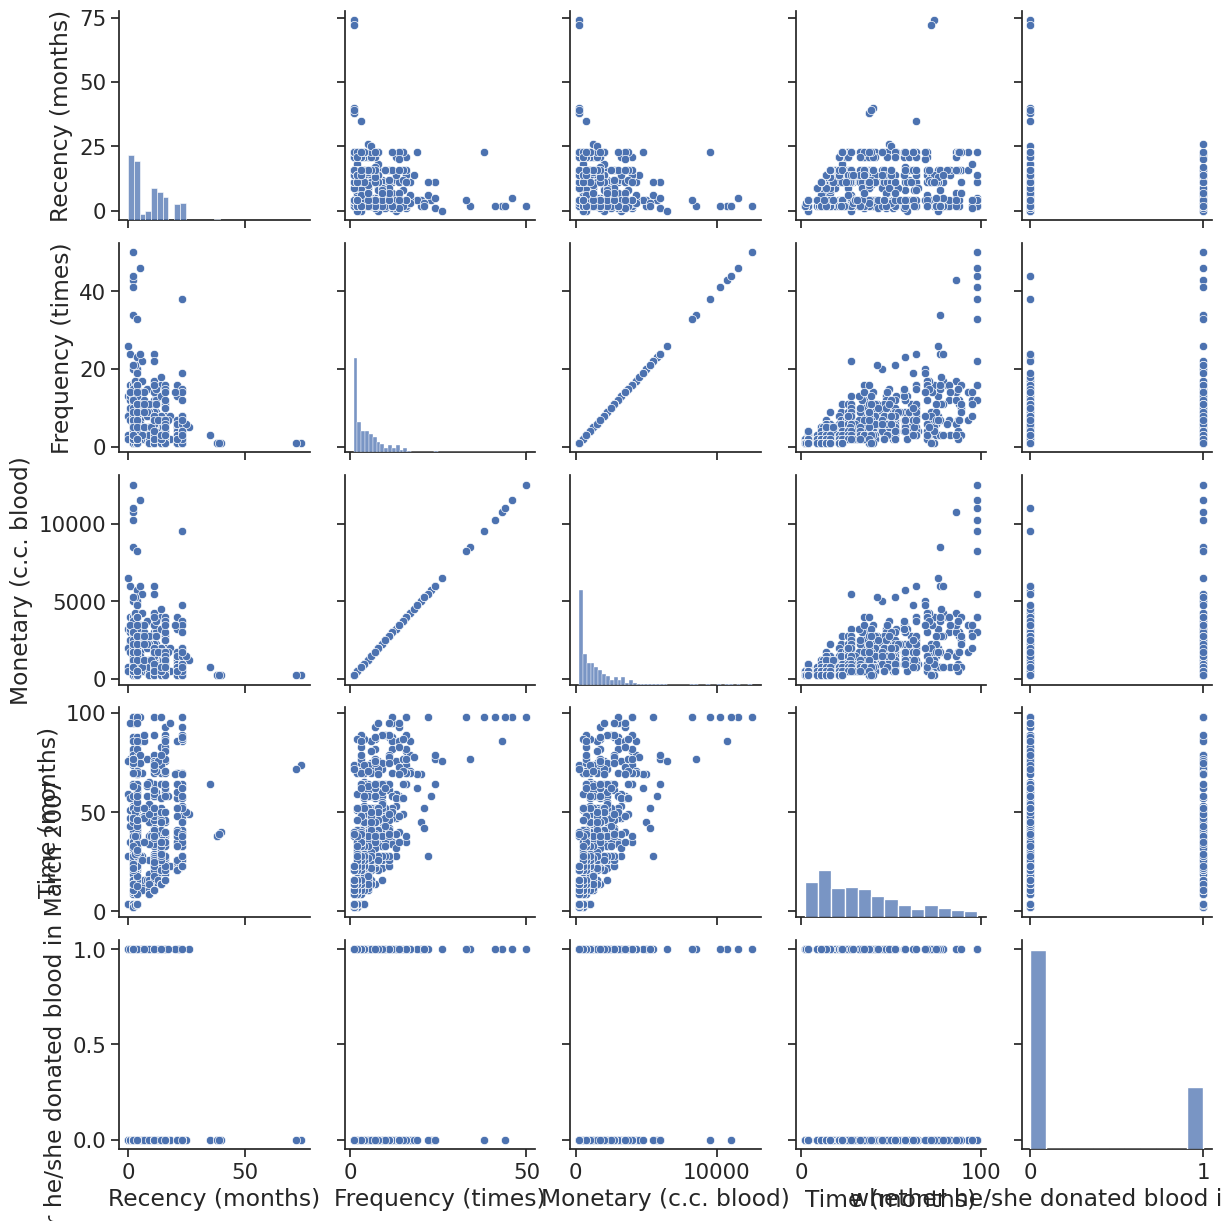

In [10]:
# Visualise the data points using pairplot
sns.pairplot(df)
plt.show()

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Step 1: Outliers (example using z-score)
z_scores = (X - X.mean()) / X.std()
outlier_threshold = 3
X_no_outliers = X[(z_scores < outlier_threshold).all(axis=1)]
y_no_outliers = y.loc[X_no_outliers.index]

# Step 2: Null Values
X_no_null = X_no_outliers.dropna()
y_no_null = y_no_outliers.loc[X_no_null.index]

# Step 3: Missing Values (example using mean imputation)
X_no_missing = X_no_null.fillna(X_no_null.mean())

# Step 4: Coded Content (example using one-hot encoding)
X_encoded = pd.get_dummies(X_no_missing)

# Step 5: Normalization (example using min-max scaling)
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X_encoded), columns=X_encoded.columns)

# Step 6: Feature Engineering (example combining features)
X_engineered = X_normalized.copy()
X_engineered['New_Feature'] = X_normalized['Recency (months)'] + X_normalized['Frequency (times)']

# Print the final prepared data
print('Prepared X data:')
print(X_engineered.head())
print('\nPrepared y data:')
print(y_no_null.head())

Prepared X data:
   Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0          0.000000           0.545455               0.545455       0.270833   
1          0.038462           0.681818               0.681818       0.343750   
2          0.076923           0.863636               0.863636       0.447917   
3          0.153846           0.136364               0.136364       0.020833   
4          0.076923           0.272727               0.272727       0.125000   

   New_Feature  
0     0.545455  
1     0.720280  
2     0.940559  
3     0.290210  
4     0.349650  

Prepared y data:
1    1
2    1
3    1
5    0
6    1
Name: whether he/she donated blood in March 2007, dtype: object


# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [15]:
# What are the input variables (features)?
print('- Input variables (features):')
print('  - %s' % ', '.join(features))

# Is there an output variable (label)?
print('- Output variable (label):')
if 'whether he/she donated blood in March 2007' in df.columns:
    outcome = 'whether he/she donated blood in March 2007'
    print('  - Yes')
else:
    outcome = None
    print('  - No')

# If there is an output variable:
if outcome:
    # Which one is it?
    print('  - Output variable: %s' % outcome)

    # What is its type?
    print('  - Output variable type: %s' % df[outcome].dtypes)

    # What type of Modelling is it?
    print('  - Modelling type:')
    print('    - [x] Supervised')
    print('    - [ ] Unsupervised')

    # What type of Modelling is it? (Classification or Regression)
    print('  - Modelling task:')
    print('    - [x] Regression' if df[outcome].dtypes != 'object' else '    - [ ] Regression')
    print('    - [x] Classification (binary)' if df[outcome].dtypes == 'int64' else '    - [ ] Classification (binary)')
    print('    - [ ] Classification (multi-class)')
    print('    - [ ] Clustering')

else:
    # What type of Modelling is it? (Supervised or Unsupervised)
    print('  - Modelling type:')
    print('    - [ ] Supervised')
    print('    - [x] Unsupervised')
    print('  - Modelling task:')
    print('    - [ ] Clustering')


- Input variables (features):
  - Recency (months), Frequency (times), Monetary (c.c. blood), Time (months)
- Output variable (label):
  - Yes
  - Output variable: whether he/she donated blood in March 2007
  - Output variable type: int64
  - Modelling type:
    - [x] Supervised
    - [ ] Unsupervised
  - Modelling task:
    - [x] Regression
    - [x] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering


# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [16]:
from sklearn.model_selection import train_test_split

# Determine the size of the testing subset
test_size = 500

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=test_size,
    random_state=100666001,
    stratify=y
)

# Print the details of the created subsets
print('Training subset:')
print('  - X_train shape: %s' % str(X_train.shape))
print('  - y_train shape: %s' % str(y_train.shape))
print('')
print('Testing subset:')
print('  - X_test shape: %s' % str(X_test.shape))
print('  - y_test shape: %s' % str(y_test.shape))

Training subset:
  - X_train shape: (248, 4)
  - y_train shape: (248,)

Testing subset:
  - X_test shape: (500, 4)
  - y_test shape: (500,)


# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [17]:
model = DecisionTreeClassifier()
print(model)

DecisionTreeClassifier()


# Step 9: Fit the Model

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score, roc_auc_score,
                             confusion_matrix, precision_recall_curve, roc_curve, auc)

def show_summary_report(actual, prediction):
    # Convert actual values to integers if it's a pandas Series
    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)

    # Convert prediction to float and round it to nearest integer
    prediction_int = np.round(prediction)

    # Compute and print accuracy
    accuracy = accuracy_score(actual, prediction_int)
    print(f'Accuracy: {accuracy:.4f} [TP / N]         Best: 1, Worst: 0')

    # Compute and print precision
    precision = precision_score(actual, prediction_int)
    print(f'Precision: {precision:.4f} [TP / (TP + FP)] Best: 1, Worst: 0')

    # Compute and print recall
    recall = recall_score(actual, prediction_int)
    print(f'Recall: {recall:.4f} [TP / (TP + FN)] Best: 1, Worst: 0')

    # Compute and print ROC AUC
    roc_auc = roc_auc_score(actual, prediction)
    print(f'ROC AUC: {roc_auc:.4f}                  Best: 1, Worst: < 0.5')

    print('-' * 80)
    print('TP: True Positives, FP: False Positives,')
    print('TN: True Negatives, FN: False Negatives,')
    print('N: Number of samples')

    # Compute confusion matrix
    mat = confusion_matrix(actual, prediction_int)

    # Compute precision and recall values for plotting
    precision, recall, _ = precision_recall_curve(actual, prediction)

    # Compute ROC curve and ROC area for plotting
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # Plotting
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square=True, annot=True, fmt='d',
                cbar=False, cmap='Blues', ax=ax[0])
    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')

    # Precision-Recall Curve
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color='b', alpha=0.2, where='post')
    ax[1].fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # Receiver Operating Characteristic (ROC) Curve
    ax[2].plot(fpr, tpr, color='darkorange', lw=2,
               label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc='lower right')

    plt.show()

In [20]:
y_train_pred = model.predict_proba(X_train)[:,1]

Accuracy: 0.9637 [TP / N]         Best: 1, Worst: 0
Precision: 0.9808 [TP / (TP + FP)] Best: 1, Worst: 0
Recall: 0.8644 [TP / (TP + FN)] Best: 1, Worst: 0
ROC AUC: 0.9924                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


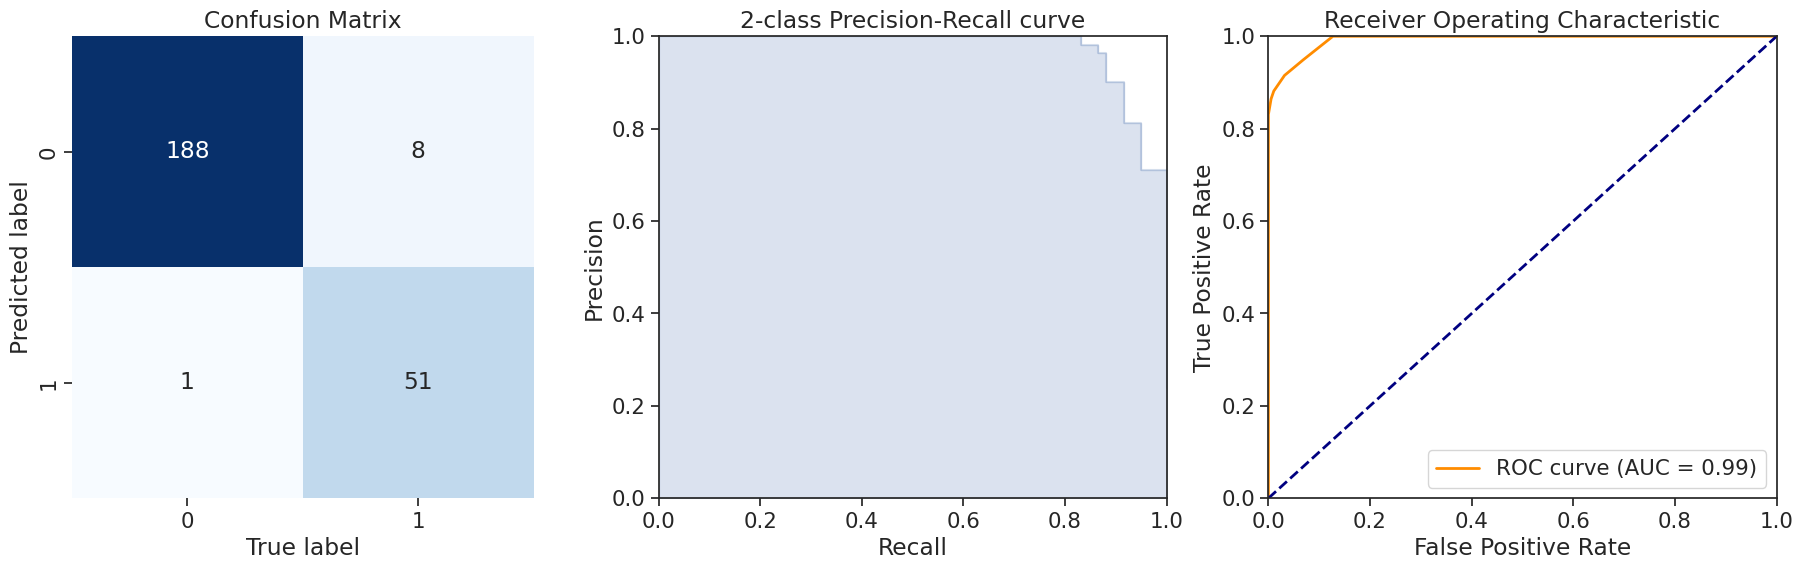

In [21]:
show_summary_report(y_train, y_train_pred)

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [22]:
y_test_pred = model.predict_proba(X_test)[:,1]

Accuracy: 0.7380 [TP / N]         Best: 1, Worst: 0
Precision: 0.4348 [TP / (TP + FP)] Best: 1, Worst: 0
Recall: 0.3361 [TP / (TP + FN)] Best: 1, Worst: 0
ROC AUC: 0.6035                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


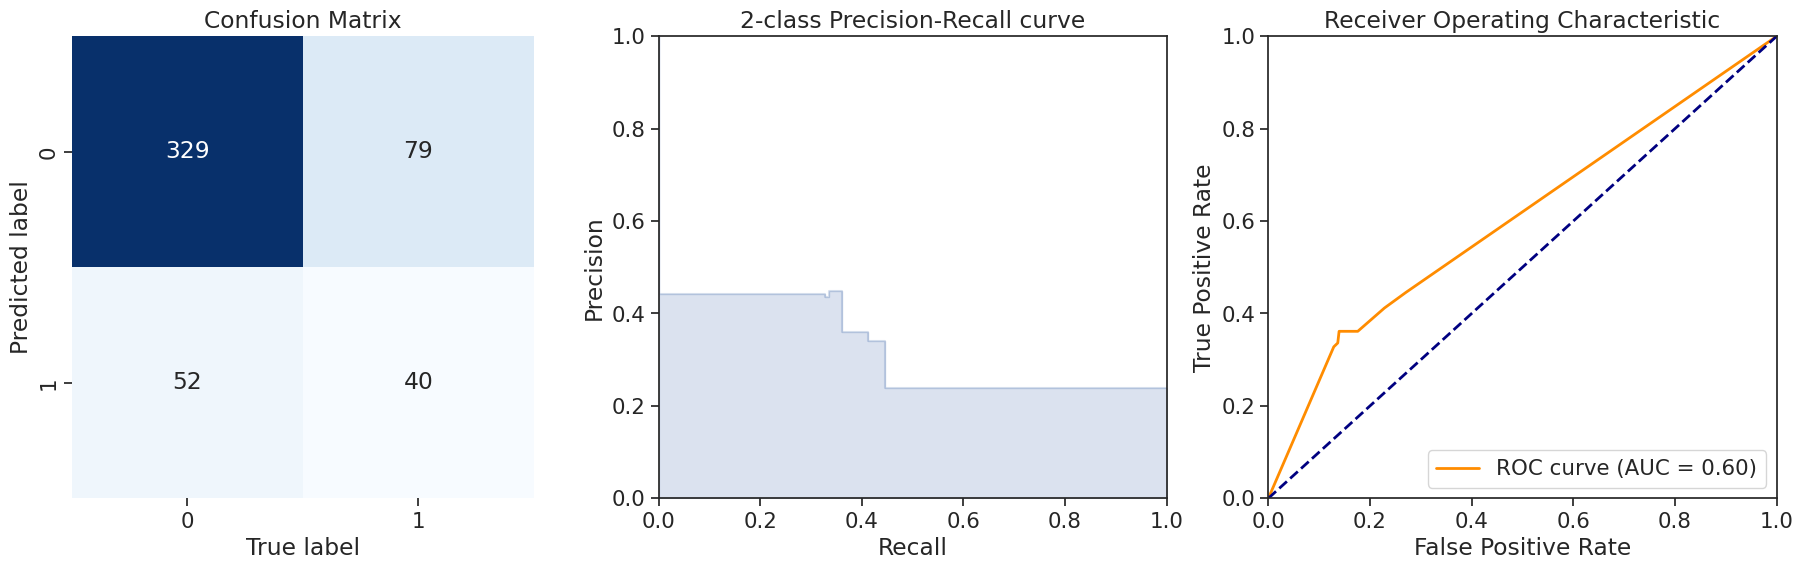

In [23]:
show_summary_report(y_test, y_test_pred)

The summary report provides evaluation metrics for a binary classification model:

* Accuracy: It indicates the proportion of correctly predicted labels out of all samples. In this case, the model achieved an accuracy of 73.80%, with 1 being the best and 0 being the worst.
* Precision: It measures the proportion of true positive predictions out of all positive predictions. A higher precision indicates a lower false positive rate. Here, the precision is 43.48%, with 1 being the best and 0 being the worst.
* Recall: It represents the proportion of true positive predictions out of all actual positive samples. A higher recall indicates a lower false negative rate. The recall score obtained is 33.61%, with 1 being the best and 0 being the worst.
* ROC AUC: It quantifies the model's ability to distinguish between classes by measuring the area under the Receiver Operating Characteristic (ROC) curve. The value obtained is 0.6035, where a value of 1 is the best and a value below 0.5 indicates poor performance.

The TP, FP, TN, FN labels represent True Positives, False Positives, True Negatives, and False Negatives, respectively. N represents the total number of samples used for evaluation.

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [24]:
# Import Libraries

from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn import tree

In [25]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

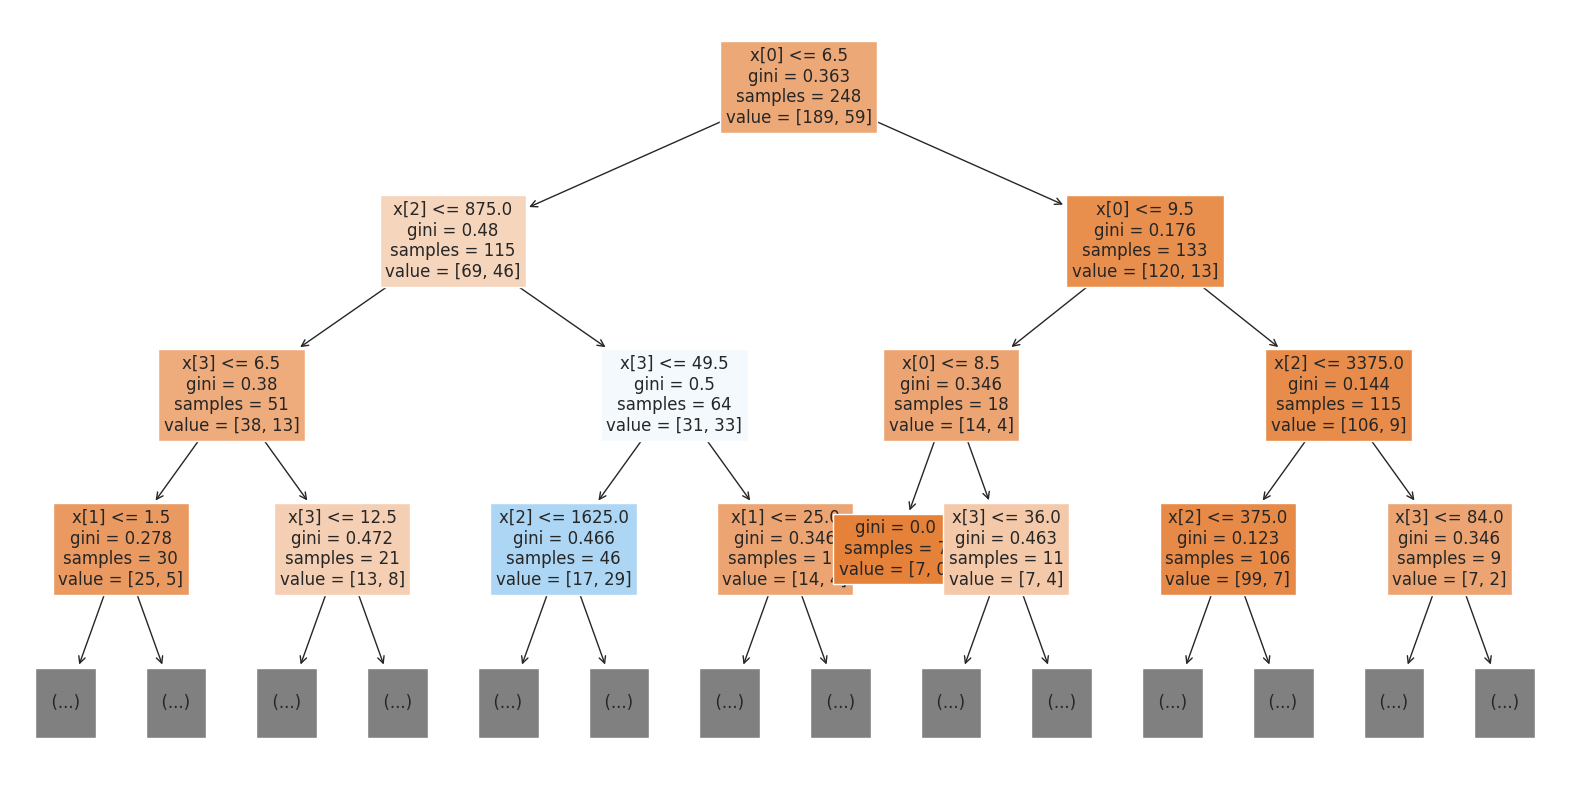

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(model, max_depth=3, fontsize=12, filled=True)
plt.show()

In [27]:
graph_data = export_graphviz(model,
                             max_depth=4,
                             proportion=True,
                             feature_names=features,
                             class_names=y.unique(),
                             filled=True,
                             rounded=True,
                             out_file=None)

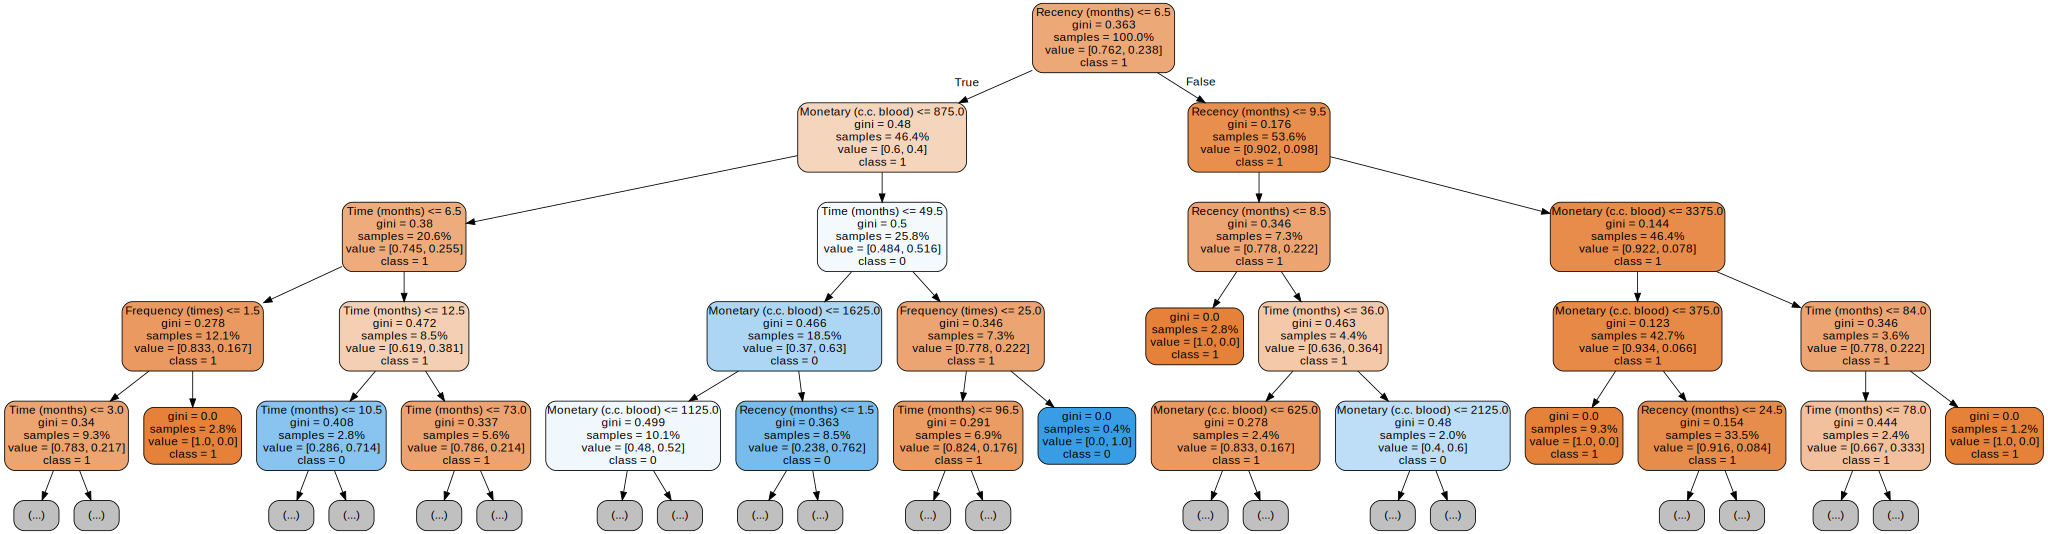

In [28]:
from graphviz import Source

# Create a GraphViz object with the decision tree data
graph = Source(graph_data)

# Set the output format of the graph as PNG
graph.format = 'png'

# Render the graph to a file named 'output.png'
graph.render(filename='output')

# Display the graph
graph




---



---



> > > > > > > > > © 2023 Institute of Data


---



---



